In [1]:
import matplotlib.pyplot as plt
from sklearn import linear_model # usando sklear para saber los valores optimos
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\orion\OneDrive\framingham.csv", sep=",")

In [3]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [4]:
data[['BMI','glucose']].head()

,BMI,glucose
0,26.97,77.0
1,28.73,76.0
2,25.34,70.0
3,28.58,103.0
4,23.10,85.0


<Axes: xlabel='BMI', ylabel='glucose'>

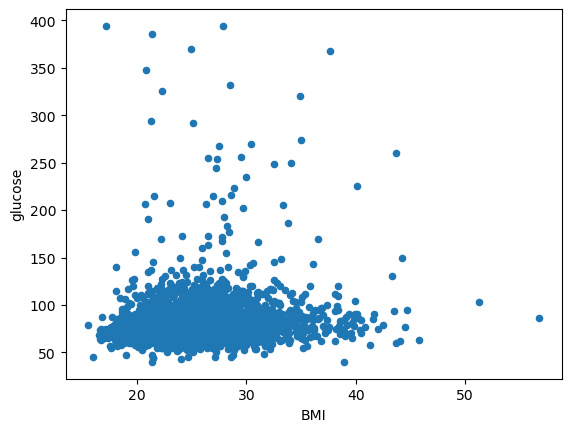

In [6]:
data[['BMI','glucose']].plot.scatter(x='BMI',y='glucose')

In [13]:
w = -3.5
b = 5.1

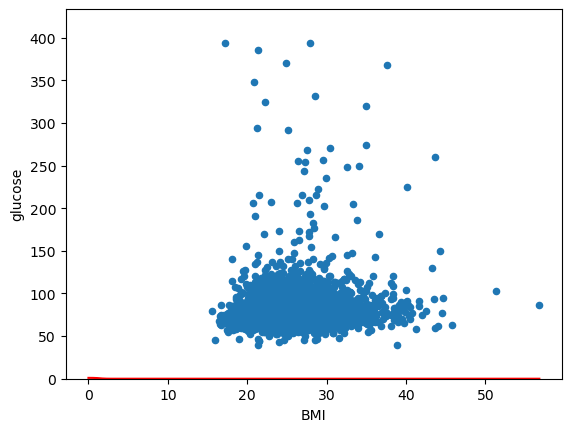

In [14]:
x = np.linspace(0,data['BMI'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
data.plot.scatter(x='BMI',y='glucose')
plt.plot(x, y, '-r')
plt.ylim(0,data['glucose'].max()*1.1)
# plt.grid()
plt.show()

In [15]:
data['sigmoid'] = 1/(1+np.exp(-(data['BMI']*w+b)))

# calculo de la funcion de error
data['loss_xi'] = -data['glucose']*np.log(data['sigmoid'])-(1-data['glucose'])*np.log(1-data['sigmoid'])
cost_j = data['loss_xi'].mean()
cost_j

7013.39061261731

In [24]:
array = np.mgrid[0.04:0.12:0.01, -2:-1:0.01].reshape(2,-1).T
df = pd.DataFrame(data = array, 
                  columns = ['w','b'])

# round para solventar problema con muchos decimales
df['w'] = np.round(df['w'], 6)
df['b'] = np.round(df['b'], 6)

In [25]:
df

,w,b
0,0.04,-2.00
1,0.04,-1.99
2,0.04,-1.98
3,0.04,-1.97
4,0.04,-1.96
...,...,...
795,0.11,-1.05
796,0.11,-1.04
797,0.11,-1.03
798,0.11,-1.02


In [26]:
def sum_error_df(df):
    data['sigmoid'] = 1/(1+np.exp(-(data['BMI']*df['w']+df['b'])))
    data['loss_xi'] = -data['glucose']*np.log(data['sigmoid'])-(1-data['glucose'])*np.log(1-data['sigmoid'])
    j_cost = data['loss_xi'].mean()
    return(j_cost)

In [27]:
df['error'] = df.apply(sum_error_df, axis=1)

In [28]:
df.sort_values(by=['error']).head()

,w,b,error
799,0.11,-1.01,-148.810169
798,0.11,-1.02,-147.999347
797,0.11,-1.03,-147.188512
796,0.11,-1.04,-146.377664
795,0.11,-1.05,-145.566804


In [29]:
df_3d = df.pivot(index='w', columns='b', values='error')

In [30]:
df_3d.head()

b,-2.00,-1.99,-1.98,-1.97,-1.96,-1.95,-1.94,-1.93,-1.92,-1.91,...,-1.10,-1.09,-1.08,-1.07,-1.06,-1.05,-1.04,-1.03,-1.02,-1.01
w,,,,,,,,,,,,,,,,,,,,,
0.04,79.266779,78.450200,77.633641,76.817103,76.000585,75.184086,74.367609,73.551151,72.734715,71.918298,...,5.863401,5.048892,4.234407,3.419947,2.605511,1.791101,0.976715,0.162355,-0.651981,-1.466292
0.05,58.114513,57.298481,56.482472,55.666485,54.850520,54.034577,53.218657,52.402759,51.586883,50.771030,...,-15.234007,-16.047880,-16.861728,-17.675551,-18.489351,-19.303125,-20.116875,-20.930601,-21.744303,-22.557980
0.06,36.977471,36.162032,35.346617,34.531225,33.715857,32.900513,32.085192,31.269895,30.454622,29.639373,...,-36.314870,-37.128126,-37.941358,-38.754567,-39.567752,-40.380915,-41.194054,-42.007169,-42.820262,-43.633331
0.07,15.856587,15.041769,14.226976,13.412207,12.597462,11.782741,10.968045,10.153373,9.338726,8.524103,...,-57.380050,-58.192727,-59.005383,-59.818016,-60.630628,-61.443218,-62.255787,-63.068334,-63.880860,-64.693365
0.08,-5.247733,-6.061922,-6.876087,-7.690227,-8.504343,-9.318435,-10.132502,-10.946545,-11.760564,-12.574558,...,-78.430819,-79.242968,-80.055098,-80.867208,-81.679299,-82.491370,-83.303421,-84.115454,-84.927467,-85.739461


In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

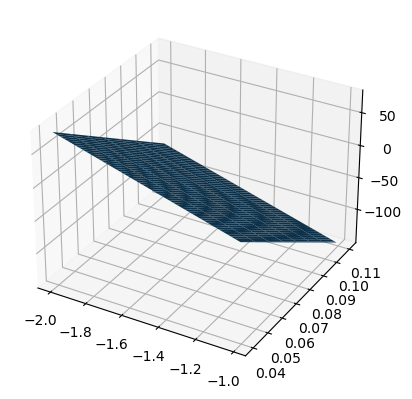

In [32]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

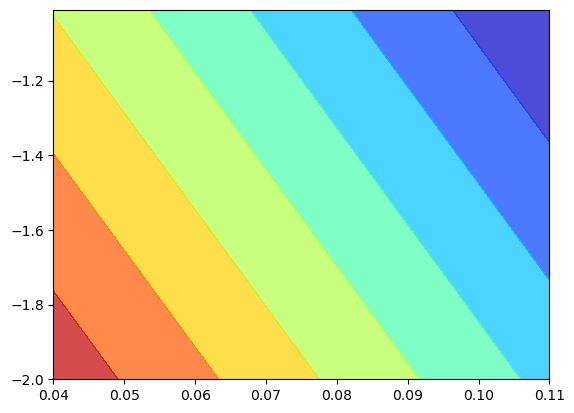

In [33]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d
plt.contourf(Y, X, Z, alpha=0.7, cmap=plt.cm.jet)

In [34]:
def delta_j_w(w, b):
    data['sigmoid'] = 1/(1+np.exp(-(data['BMI']*w+b)))
    data['partial_loss'] = (data['sigmoid']-data['glucose'])*data['BMI']
    derivative = data['partial_loss'].mean()
    return(derivative) 

def delta_j_b(w, b):
    data['sigmoid'] = 1/(1+np.exp(-(data['BMI']*w+b)))
    data['partial_loss'] = (data['sigmoid']-data['glucose'])
    derivative = data['partial_loss'].mean()
    return(derivative) 

In [35]:
w_0 = 0.5
b_0 = -4.6

In [36]:
alpha_w = 0.03
alpha_b = 0.02

w_new = w_0 - alpha_w * delta_j_w(w_0, b_0)
b_new = b_0 - alpha_b * delta_j_b(w_0, b_0)

w_0 = w_new
b_0 = b_new

print(w_0, b_0)

63.42285370077283 -2.98127231621655
